# **Rhythm Space Theory and Nearest Quarter Equivalent**
- **Objective:** Explain the approach to the algorithmic process of the "Every Drum Beat Ever" App.
---
### **Contributor(s):**
- Chris Burrows (Lead Programmer / Designer) 
---
### **Preface:**
- The following Notebook analyzes an algorithmic approach to deciphering how to implement a random assignment of `partials` within any given bar, either by USER or RANDOM parameters. 
---


## 1). Setup - Musical Theory

In [7]:
#@title i. Import Statements
import math
import random

In [8]:
#@title ii. Time Signature 
# This codeblock represents a time signature ( how many note types per measure / note type )
time_signature_list = [str(i) + '/4' for i in range(1, 10)] + [str(i) + '/8' for i in range(1, 16)] \
                      + [str(i) + '/16' for i in range(1, 33)]
print("time_signature_list:", time_signature_list)  # VERIFY time_signature_list!

time_signature_list: ['1/4', '2/4', '3/4', '4/4', '5/4', '6/4', '7/4', '8/4', '9/4', '1/8', '2/8', '3/8', '4/8', '5/8', '6/8', '7/8', '8/8', '9/8', '10/8', '11/8', '12/8', '13/8', '14/8', '15/8', '1/16', '2/16', '3/16', '4/16', '5/16', '6/16', '7/16', '8/16', '9/16', '10/16', '11/16', '12/16', '13/16', '14/16', '15/16', '16/16', '17/16', '18/16', '19/16', '20/16', '21/16', '22/16', '23/16', '24/16', '25/16', '26/16', '27/16', '28/16', '29/16', '30/16', '31/16', '32/16']


**NOTE**: The `time signature` fraction is also equivalent to a `bar length` mathematically, as shown below.

In [9]:
#@title iii. Bar Length
# The `bar_length` represents the `time_signature` converted a decimal
def bar_length(time_signature: str):
    """ IN: time_signature, OUT: bar_length """
    ts_numerator, ts_denominator = time_signature.split('/')
    return int(ts_numerator) / int(ts_denominator)

bar_length_list = [bar_length(time_signature_list[i]) for
                   i in range(len(time_signature_list))]
print("bar_length_list:", bar_length_list)

bar_length_list: [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375, 1.0, 1.0625, 1.125, 1.1875, 1.25, 1.3125, 1.375, 1.4375, 1.5, 1.5625, 1.625, 1.6875, 1.75, 1.8125, 1.875, 1.9375, 2.0]


In [10]:
#@title iv. Nearest Quarter Equivalent
# How the APP determines how much space a partial 'group' takes 
def nearest_quarter_equivalent(bar_length: float):
    """ IN: bar_length (float), OUT: Nearest Quarter Equivalent (int) """
    nqe = math.floor(bar_length)
    return nqe


NQE_list = [nearest_quarter_equivalent(bar_length_list[i]) for
            i in range(len(bar_length_list))]
print('NQE_list:', NQE_list)

NQE_list: [0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]


**NOTE:** As you can see, some of the `bar lengths` exceed the Nearest Quarter Equivalent. This would pose an issue to our algorithm depending on how we validate the types of `partials` to implement into our bar ( assuming a `quarter note` == 1.0 ). Let's next take a look at what kind of `bar lengths` our `partials` take up.

In [11]:
#@title va. 8th Note Partial Dictionary
# The `partial` represents a partial (4/9 = 9let, 4/10 = 5let, 4/12 = 3let, etc.)
# This constructs an '8th note partial dictionary'
partial_keys = ['8th', '9th', '10th', '11th', '3rd', '13th', '7th']
partial_list = [4 / i for i in range(8, 15)]
partials_8th = {}
for i in range(len(partial_list)):
    partials_8th[partial_keys[i]] = partial_list[i]
print("8th_partial_dict:", partials_8th)  # VERIFY Partial Dict!

8th_partial_dict: {'8th': 0.5, '9th': 0.4444444444444444, '10th': 0.4, '11th': 0.36363636363636365, '3rd': 0.3333333333333333, '13th': 0.3076923076923077, '7th': 0.2857142857142857}


**NOTE:** The above `8th Partial Dict` represents each type of `partial` in `8th notes`:

> 8th = (4/8), 9th = (4/9), 5th = (4 / 10), 11th = (4 / 11) etc. 

We can attain a `whole note` from an `8th partial` by multiplying by 8...

> (4 / 8) * 8 = 4.0 (Whole Note Length)

Likewise, can attain a `whole note 5th` from a `5th partial` by multiplying by 8...

> (4 / 10) * 8 = 3.2 (5th Partial Whole Note Length)




In [12]:
#@title vb. ENITRE Partial Dictionary - Whole -> 32nd
# In order to construct the ENTIRE Partial Dict with subdivisions:
subdivision_keys = ['1st(Whole)', '2nd(Half)', '4th(Quarter)', '8th',
                    '16th', '32nd']  # After Quarter they are read as pronounced
subdivision_list = [8, 4, 2, 1, .5, .25]  # Multipliers to achieve different subdivisions
partials = {}
for i in range(len(partial_keys)):
    for j in range(len(subdivision_keys)):
        partials[partial_keys[i] + '_' + subdivision_keys[j]] = \
            partial_list[i] * subdivision_list[j]
print("FULL partial dict:", partials)

FULL partial dict: {'8th_1st(Whole)': 4.0, '8th_2nd(Half)': 2.0, '8th_4th(Quarter)': 1.0, '8th_8th': 0.5, '8th_16th': 0.25, '8th_32nd': 0.125, '9th_1st(Whole)': 3.5555555555555554, '9th_2nd(Half)': 1.7777777777777777, '9th_4th(Quarter)': 0.8888888888888888, '9th_8th': 0.4444444444444444, '9th_16th': 0.2222222222222222, '9th_32nd': 0.1111111111111111, '10th_1st(Whole)': 3.2, '10th_2nd(Half)': 1.6, '10th_4th(Quarter)': 0.8, '10th_8th': 0.4, '10th_16th': 0.2, '10th_32nd': 0.1, '11th_1st(Whole)': 2.909090909090909, '11th_2nd(Half)': 1.4545454545454546, '11th_4th(Quarter)': 0.7272727272727273, '11th_8th': 0.36363636363636365, '11th_16th': 0.18181818181818182, '11th_32nd': 0.09090909090909091, '3rd_1st(Whole)': 2.6666666666666665, '3rd_2nd(Half)': 1.3333333333333333, '3rd_4th(Quarter)': 0.6666666666666666, '3rd_8th': 0.3333333333333333, '3rd_16th': 0.16666666666666666, '3rd_32nd': 0.08333333333333333, '13th_1st(Whole)': 2.4615384615384617, '13th_2nd(Half)': 1.2307692307692308, '13th_4th(Quar

NOTE: These are fractional values of partials. The 5th Partial Whole Note would only resolve to it's `Nearest Quarter Equivalent`:

> (4 / 10) * 8 = 3.2 * 5 = 16.0 [ (4) `Whole Notes` or (4) `Bars` of `4/4`
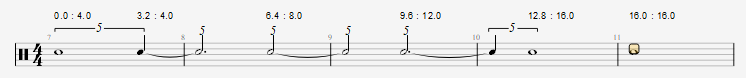



## 2). Setup - Pythonic Theory

In [13]:
#@title Integer / Floor Tests

# Integer to Floor test:
int_test, flr_test = 1, math.floor(1.5)
if int_test == flr_test:
    print("Integer does equal floor!", int_test, '=', flr_test)

# Partial to Nearest Quarter Equivalent Test
partial_test_11_8th, nqe_test = 4/11, 4
if partial_test_11_8th * 11 == nqe_test:
    print("(8) 11let 8th does equal a whole note!")

Integer does equal floor! 1 = 1
(8) 11let 8th does equal a whole note!


**NOTE**: We want to make sure that the Pythonic Language can store and handle precise fractions so that there are no strange rounding circumstances that would leave in incomplete / incoherent `bar lengths`. Fortunately, the above test proved that Python can store and execute precise fractions within lists.

## 3a). Troubleshooting - USER / APP 

###i. USER Parameter Input Issue

> Let's consider the USER experience in the following example:



In [26]:
# Example 1: USER selects the following:: [Weight[0-5], Breakability(Divisor / Reciprocal)]
USER_selections = { 'time_signature' : '11/16', 'bar_length' : 11/16, "8th_1st(Whole)" : [1, 0], "8th_2nd(Half)" : [1, 0], 
                   "8th_4th(Quarter)" : [1, 0], "8th_8th" : [1, 0], "8th_16th" : [1, 2/16], "8th_32nd" : [0, 0] }
print(USER_selections)

{'time_signature': '11/16', 'bar_length': 0.6875, '8th_1st(Whole)': [1, 0], '8th_2nd(Half)': [1, 0], '8th_4th(Quarter)': [1, 0], '8th_8th': [1, 0], '8th_16th': [1, 0.125], '8th_32nd': [0, 0]}


**Note**: We have NO WAY to fill up this time signature without:

1. Forcing a different `subdivision`
2. Forcing a different `breakability`
3. Forcing the User to Select at LEAST the smallest partial in the `time_signature`

Option #3 seems to be the best USER Experience; perhaps we can incorporate a 'flash message' when the most basic partial is NOT SELECTED.

*   `1/8` requires `8th Notes`
*   `5/4` requres `quarter notes`
*   `6/4` requires `half notes`??

This is TRICKY as time signatures are fractions of each other... `6/8` = `3/4` = `12/16`





###ii.) APP Randomize Issue

> Let's consider how the ALGORITHM(APP) may approach RANDOMIZATION:



In [27]:
# Example 1: APP selects the following:: [Weight[0-5], Breakability(Divisor / Reciprocal)]
APP_selections =  { 'time_signature' : '13/16', 'bar_length' : 13/16, "11th_1st(Whole)" : [1, 0], "11th_16th" : [0, 0], 
                   "8th_4th(Quarter)" : [1, 0], "8th_8th" : [1, 0], "8th_16th" : [1, 2/16], "8th_32nd" : [0, 0] }
print(APP_selections)

{'time_signature': '13/16', 'bar_length': 0.8125, '11th_1st(Whole)': [1, 0], '11th_16th': [0, 0], '8th_4th(Quarter)': [1, 0], '8th_8th': [1, 0], '8th_16th': [1, 0.125], '8th_32nd': [0, 0]}


**Note**: If the APP Randomly chooses the 11_1st Whole note; it may not be able to finish the bar unless without:

1. Forcing a different `subdivision`
2. Forcing a different `breakability`
3. Enforcing a `nearest_quarter_equivalent` clause on ALL NOTES:






##3b). Solution #1 - Easier Design

 The best algorithm whether or not a `partial` should be assigned to the `bar` should be the following:

1.   Calculate the `Bar Length` AKA `Time Signature` Fractional Value...
2.   Return ONLY the notes that fit the `Bar Length` within their `Nearest Quarter Equivalent`
3.   `Random Assignment Takes Place`
4.   `Shuffle` Notes based on `Breakability`
5.   Return MIDI

Example #1

1.  `3/8` = 1.5
2.  EXCLUDE: [`Whole Notes`(4.0), `Half Notes`(2.0), `3let_4th`(Quarters)(2.0)]
3.  For example: `3let_8th`(1.0) can be used ONCE, assuming there is space left.
4.  If the `breakability` of the 3let_8th is `1/3`, we can break it apart here!
5.  Return MIDI

**DRAWBACKS:** This algorithm isn't too hard to implement, however, you could actually fit (2) `3let_4th`(Quarters) in that space assuming the `breakability` was [1/3, 2/3] = 1.333333333333333. 
However, Solution #1 Algorithm wouldn't address this and would omit the `partial` all together.

This is more true to the Pathos Algorithm and the Nearest Quarter Equivalent makes the calculations and option additions easy per time signature.  








##3c). Solution #2 - Complex Design

 The most intricate algorithm whether or not a `partial` should be assigned to the `bar` should be the following:

1.   Calculate the `Bar Length` AKA `Time Signature` Fractional Value...
2.   Return ONLY the notes that fit the `Bar Length` within their `Remaining Bar Length`
3.   `Random Assignment Takes Place`
4.   `Shuffle` Notes based on `Breakability`
5.   Return MIDI

Example #1

1.  `3/8` = 1.5
2.  EXCLUDE: [ONLY WHAT THE USER CHOOSES]
3.  
4.
5.

**DRAWBACKS:** This algorithm is a bit more complex; and I don't quite have it worked out. You would basically have to return `partials` and `breakability` in ANTICIPATION of the `time signature`. This would be a bit more difficult order of combining operations and partial assigments.

FOR EXAMPLE:
<br>`3/8` time signature = 1.5 bar length <br>
`partial form` returns:
- `3let_4th(Quarter)`:[1, 1/3] 
- `3let_8th`:[1, 1/3]
- `3let_16th`:[1, 1/6] 

Each of these notes are forced by the smallest partial that works in the `Remaing Bar Length` (.333) / (1.5) <br>
(4) `3let_8th` [1.33] + (1) `3let_16th` [.166] = (3/8) [1.5] <br>
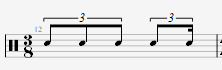











##4). Conclusion
In the sake of time, I've chosen to use Solution #1 with the Nearest Quarter Equivalent as my APP's algorithm process. It is more true to the original algorithm I had in mind to begin writing the Pathos album.